In [154]:
from collections import defaultdict
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import pickle
from sklearn.manifold import TSNE

In [155]:
my_dir_path = r'C:\Users\500060658\Documents\Major 1\New folder\bbc\business'

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
business = pd.DataFrame(results)

In [156]:
business.tail()

,file_name,text
505,506.txt,Trial begins of Spain's top banker\n\nThe tria...
506,507.txt,UK economy ends year with spurt\n\nThe UK econ...
507,508.txt,HealthSouth ex-boss goes on trial\n\nThe forme...
508,509.txt,Euro firms miss out on optimism\n\nMore than 9...
509,510.txt,Lacroix label bought by US firm\n\nLuxury good...


In [157]:
business['category'] = 'business'

In [158]:
business.tail()

,file_name,text,category
505,506.txt,Trial begins of Spain's top banker\n\nThe tria...,business
506,507.txt,UK economy ends year with spurt\n\nThe UK econ...,business
507,508.txt,HealthSouth ex-boss goes on trial\n\nThe forme...,business
508,509.txt,Euro firms miss out on optimism\n\nMore than 9...,business
509,510.txt,Lacroix label bought by US firm\n\nLuxury good...,business


In [159]:
my_dir_path1 = r'C:\Users\500060658\Documents\Major 1\New folder\bbc\entertainment'

results = defaultdict(list)
for file in Path(my_dir_path1).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
entertainment = pd.DataFrame(results)

In [160]:
entertainment.head()

,file_name,text
0,001.txt,Gallery unveils interactive tree\n\nA Christma...
1,002.txt,Jarre joins fairytale celebration\n\nFrench mu...
2,003.txt,Musical treatment for Capra film\n\nThe classi...
3,004.txt,Richard and Judy choose top books\n\nThe 10 au...
4,005.txt,Poppins musical gets flying start\n\nThe stage...


In [161]:
entertainment['category'] = 'entertainment'

In [162]:
entertainment.head()

,file_name,text,category
0,001.txt,Gallery unveils interactive tree\n\nA Christma...,entertainment
1,002.txt,Jarre joins fairytale celebration\n\nFrench mu...,entertainment
2,003.txt,Musical treatment for Capra film\n\nThe classi...,entertainment
3,004.txt,Richard and Judy choose top books\n\nThe 10 au...,entertainment
4,005.txt,Poppins musical gets flying start\n\nThe stage...,entertainment


In [163]:
my_dir_path2 = r'C:\Users\500060658\Documents\Major 1\New folder\bbc\politics'

results = defaultdict(list)
for file in Path(my_dir_path2).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
politics = pd.DataFrame(results)

In [164]:
politics.head()

,file_name,text
0,001.txt,Labour plans maternity pay rise\n\nMaternity p...
1,002.txt,Watchdog probes e-mail deletions\n\nThe inform...
2,003.txt,Hewitt decries 'career sexism'\n\nPlans to ext...
3,004.txt,Labour chooses Manchester\n\nThe Labour Party ...
4,005.txt,Brown ally rejects Budget spree\n\nChancellor ...


In [165]:
politics['category'] = 'politics'

In [166]:
politics.head()

,file_name,text,category
0,001.txt,Labour plans maternity pay rise\n\nMaternity p...,politics
1,002.txt,Watchdog probes e-mail deletions\n\nThe inform...,politics
2,003.txt,Hewitt decries 'career sexism'\n\nPlans to ext...,politics
3,004.txt,Labour chooses Manchester\n\nThe Labour Party ...,politics
4,005.txt,Brown ally rejects Budget spree\n\nChancellor ...,politics


In [167]:
my_dir_path3 = r'C:\Users\500060658\Documents\Major 1\New folder\bbc\sport'

results = defaultdict(list)
for file in Path(my_dir_path3).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
sports = pd.DataFrame(results)

In [168]:
sports.head()

,file_name,text
0,001.txt,Claxton hunting first major medal\n\nBritish h...
1,002.txt,O'Sullivan could run in Worlds\n\nSonia O'Sull...
2,003.txt,Greene sets sights on world title\n\nMaurice G...
3,004.txt,IAAF launches fight against drugs\n\nThe IAAF ...
4,005.txt,"Dibaba breaks 5,000m world record\n\nEthiopia'..."


In [169]:
sports['category'] = 'sports'

In [170]:
sports.head()

,file_name,text,category
0,001.txt,Claxton hunting first major medal\n\nBritish h...,sports
1,002.txt,O'Sullivan could run in Worlds\n\nSonia O'Sull...,sports
2,003.txt,Greene sets sights on world title\n\nMaurice G...,sports
3,004.txt,IAAF launches fight against drugs\n\nThe IAAF ...,sports
4,005.txt,"Dibaba breaks 5,000m world record\n\nEthiopia'...",sports


In [171]:
my_dir_path4 = r'C:\Users\500060658\Documents\Major 1\New folder\bbc\tech'

results = defaultdict(list)
for file in Path(my_dir_path4).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
tech = pd.DataFrame(results)

In [172]:
tech.head()

,file_name,text
0,001.txt,Ink helps drive democracy in Asia\n\nThe Kyrgy...
1,002.txt,China net cafe culture crackdown\n\nChinese au...
2,003.txt,Microsoft seeking spyware trojan\n\nMicrosoft ...
3,004.txt,Digital guru floats sub-$100 PC\n\nNicholas Ne...
4,005.txt,Technology gets the creative bug\n\nThe hi-tec...


In [173]:
tech['category'] = 'tech'

In [174]:
tech.head()

,file_name,text,category
0,001.txt,Ink helps drive democracy in Asia\n\nThe Kyrgy...,tech
1,002.txt,China net cafe culture crackdown\n\nChinese au...,tech
2,003.txt,Microsoft seeking spyware trojan\n\nMicrosoft ...,tech
3,004.txt,Digital guru floats sub-$100 PC\n\nNicholas Ne...,tech
4,005.txt,Technology gets the creative bug\n\nThe hi-tec...,tech


In [175]:
data = pd.concat([business,entertainment,politics,sports,tech])

In [176]:
print(data.shape)

(2225, 3)


In [177]:
data.head()

,file_name,text,category
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [178]:
data.reset_index(inplace = True)

In [179]:
data.head()

,index,file_name,text,category
0,0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business
4,4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [180]:
data.drop(['index'],axis = 1,inplace = True)

In [181]:
data.head(512)

,file_name,text,category
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business
5,006.txt,Japan narrowly escapes recession\n\nJapan's ec...,business
6,007.txt,Jobs growth still slow in the US\n\nThe US cre...,business
7,008.txt,"India calls for fair trade rules\n\nIndia, whi...",business
8,009.txt,Ethiopia's crop production up 24%\n\nEthiopia ...,business
9,010.txt,Court rejects $280bn tobacco case\n\nA US gove...,business


In [182]:
data['text'].iloc[0]

'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to si

In [183]:
cat_count = data.groupby('category')['text'].count()

In [184]:
cat_count = pd.DataFrame(cat_count)

In [185]:
cat_count

,text
category,
business,510
entertainment,386
politics,417
sports,511
tech,401


Text(0.5, 0, 'categories')

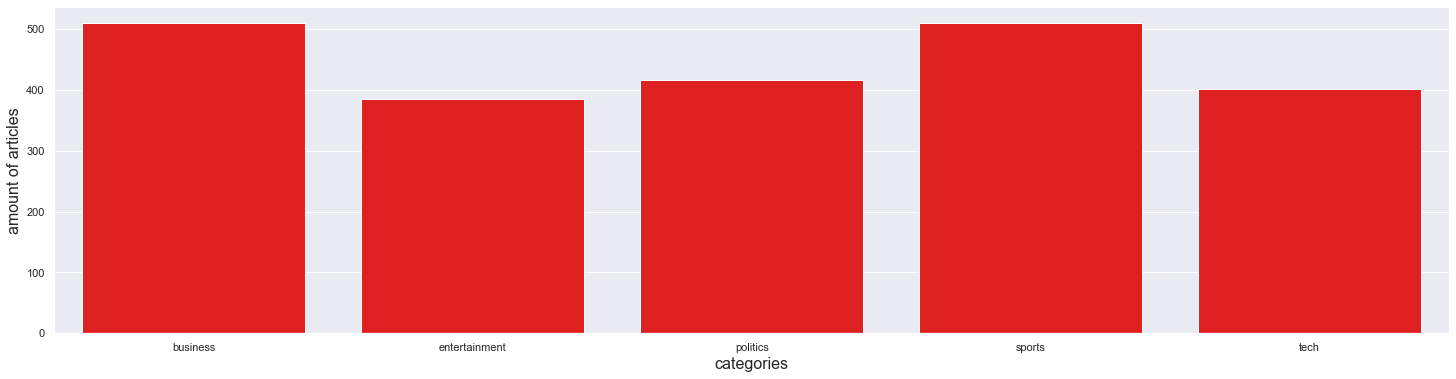

In [186]:
plt.figure(figsize = (25,6))
sns.barplot(x = cat_count.index, y = cat_count['text'], color = 'red')
plt.ylabel('amount of articles', fontsize = 16)
plt.xlabel('categories', fontsize = 16)

In [187]:
data['length'] = data['text'].str.len()

In [188]:
data.head()

,file_name,text,category,length
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,2560
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,2252
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,1552
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,2412
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,1570


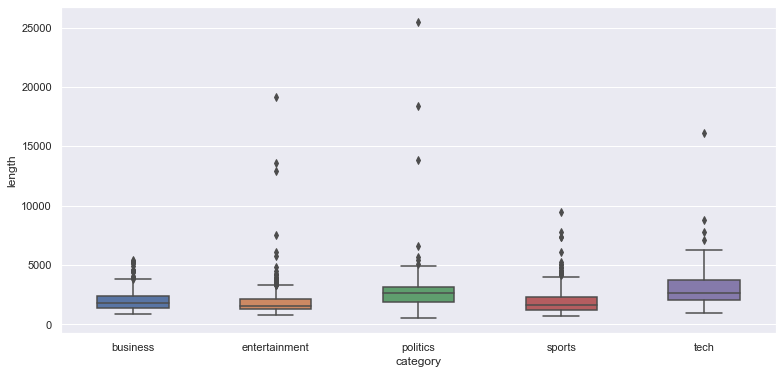

In [189]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data= data, x='category', y='length', width=.5);

In [190]:
quantile_95 = data['length'].quantile(0.95)
data_95 = data[data['length'] < quantile_95]

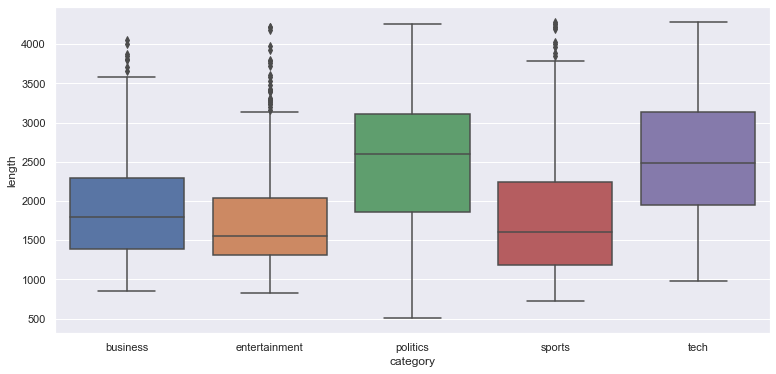

In [191]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data_95, x='category', y='length');

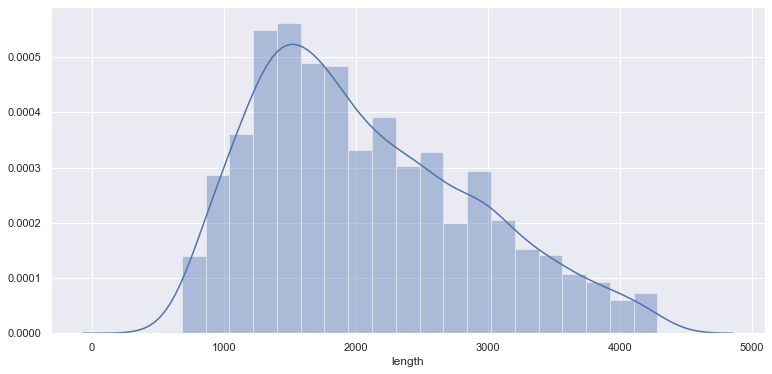

In [192]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_95['length'])

In [193]:
data.head()

,file_name,text,category,length
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,2560
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,2252
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,1552
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,2412
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,1570


In [194]:
data.loc[1]['text']

'Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions u

In [195]:
data['cleantext_1'] = data['text'].str.replace("\r", " ")
data['cleantext_1'] = data['cleantext_1'].str.replace("\n", " ")
data['cleantext_1'] = data['cleantext_1'].str.replace("    ", " ")

In [196]:
data.loc[1]['cleantext_1']

'Dollar gains on Greenspan speech  The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.  And Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions under

In [197]:
data['cleantext_1'] = data['cleantext_1'].str.replace('"', '')

In [198]:
data['cleantext_2'] = data['cleantext_1'].str.lower()

In [199]:
p_signs = list("?:!.,;")
data['cleantext_3'] = data['cleantext_2']
for p in p_signs:
    data['cleantext_3'] = data['cleantext_3'].str.replace(p, '')

In [200]:
data.loc[1]['cleantext_3']

"dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise  and alan greenspan highlighted the us government's willingness to curb spending and rising household savings as factors which may help to reduce it in late trading in new york the dollar reached $12871 against the euro from $12974 on thursday market concerns about the deficit has hit the greenback in recent months on friday federal reserve chairman mr greenspan's speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data i think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time said robert sinche head of currency strategy at bank of america in new york he's taking a longer-term view laying out a set of conditions under which the current acc

In [201]:
data['cleantext_4'] = data['cleantext_3'].str.replace("'s", "")

In [202]:
data.loc[1]['cleantext_4']

'dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise  and alan greenspan highlighted the us government willingness to curb spending and rising household savings as factors which may help to reduce it in late trading in new york the dollar reached $12871 against the euro from $12974 on thursday market concerns about the deficit has hit the greenback in recent months on friday federal reserve chairman mr greenspan speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data i think the chairman taking a much more sanguine view on the current account deficit than he taken for some time said robert sinche head of currency strategy at bank of america in new york he taking a longer-term view laying out a set of conditions under which the current account defic

In [203]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\500060658\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\500060658\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [204]:
wl = WordNetLemmatizer()

In [205]:
nr = len(data)
ltl = []

for row in range(0, nr):
    ll = []
    
    text = data.loc[row]['cleantext_4']
    text_words = text.split(" ")
    
    for word in text_words:
        ll.append(wl.lemmatize(word, pos = "v"))
    
    lt = " ".join(ll)
    ltl.append(lt)

In [206]:
data['cleantext_5'] = ltl

In [207]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\500060658\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [208]:
stop_words = list(stopwords.words('english'))

In [209]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [210]:
data['cleantext_6'] = data['cleantext_5']

for sw in stop_words:
    regex_stopword = r"\b" + sw + r"\b"
    data['cleantext_6'] = data['cleantext_6'].str.replace(regex_stopword, '')

In [211]:
data.loc[6]['text']

'Jobs growth still slow in the US\n\nThe US created fewer jobs than expected in January, but a fall in jobseekers pushed the unemployment rate to its lowest level in three years.\n\nAccording to Labor Department figures, US firms added only 146,000 jobs in January. The gain in non-farm payrolls was below market expectations of 190,000 new jobs. Nevertheless it was enough to push down the unemployment rate to 5.2%, its lowest level since September 2001. The job gains mean that President Bush can celebrate - albeit by a very fine margin - a net growth in jobs in the US economy in his first term in office. He presided over a net fall in jobs up to last November\'s Presidential election - the first President to do so since Herbert Hoover. As a result, job creation became a key issue in last year\'s election. However, when adding December and January\'s figures, the administration\'s first term jobs record ended in positive territory.\n\nThe Labor Department also said it had revised down th

In [212]:
data.loc[6]['cleantext_1']

"Jobs growth still slow in the US  The US created fewer jobs than expected in January, but a fall in jobseekers pushed the unemployment rate to its lowest level in three years.  According to Labor Department figures, US firms added only 146,000 jobs in January. The gain in non-farm payrolls was below market expectations of 190,000 new jobs. Nevertheless it was enough to push down the unemployment rate to 5.2%, its lowest level since September 2001. The job gains mean that President Bush can celebrate - albeit by a very fine margin - a net growth in jobs in the US economy in his first term in office. He presided over a net fall in jobs up to last November's Presidential election - the first President to do so since Herbert Hoover. As a result, job creation became a key issue in last year's election. However, when adding December and January's figures, the administration's first term jobs record ended in positive territory.  The Labor Department also said it had revised down the jobs gai

In [213]:
data.loc[6]['cleantext_2']

"jobs growth still slow in the us  the us created fewer jobs than expected in january, but a fall in jobseekers pushed the unemployment rate to its lowest level in three years.  according to labor department figures, us firms added only 146,000 jobs in january. the gain in non-farm payrolls was below market expectations of 190,000 new jobs. nevertheless it was enough to push down the unemployment rate to 5.2%, its lowest level since september 2001. the job gains mean that president bush can celebrate - albeit by a very fine margin - a net growth in jobs in the us economy in his first term in office. he presided over a net fall in jobs up to last november's presidential election - the first president to do so since herbert hoover. as a result, job creation became a key issue in last year's election. however, when adding december and january's figures, the administration's first term jobs record ended in positive territory.  the labor department also said it had revised down the jobs gai

In [214]:
data.loc[6]['cleantext_3']

"jobs growth still slow in the us  the us created fewer jobs than expected in january but a fall in jobseekers pushed the unemployment rate to its lowest level in three years  according to labor department figures us firms added only 146000 jobs in january the gain in non-farm payrolls was below market expectations of 190000 new jobs nevertheless it was enough to push down the unemployment rate to 52% its lowest level since september 2001 the job gains mean that president bush can celebrate - albeit by a very fine margin - a net growth in jobs in the us economy in his first term in office he presided over a net fall in jobs up to last november's presidential election - the first president to do so since herbert hoover as a result job creation became a key issue in last year's election however when adding december and january's figures the administration's first term jobs record ended in positive territory  the labor department also said it had revised down the jobs gains in december 20

In [215]:
data.loc[6]['cleantext_4']

'jobs growth still slow in the us  the us created fewer jobs than expected in january but a fall in jobseekers pushed the unemployment rate to its lowest level in three years  according to labor department figures us firms added only 146000 jobs in january the gain in non-farm payrolls was below market expectations of 190000 new jobs nevertheless it was enough to push down the unemployment rate to 52% its lowest level since september 2001 the job gains mean that president bush can celebrate - albeit by a very fine margin - a net growth in jobs in the us economy in his first term in office he presided over a net fall in jobs up to last november presidential election - the first president to do so since herbert hoover as a result job creation became a key issue in last year election however when adding december and january figures the administration first term jobs record ended in positive territory  the labor department also said it had revised down the jobs gains in december 2004 from 

In [216]:
data.loc[6]['cleantext_5']

'job growth still slow in the us  the us create fewer job than expect in january but a fall in jobseekers push the unemployment rate to its lowest level in three years  accord to labor department figure us firm add only 146000 job in january the gain in non-farm payrolls be below market expectations of 190000 new job nevertheless it be enough to push down the unemployment rate to 52% its lowest level since september 2001 the job gain mean that president bush can celebrate - albeit by a very fine margin - a net growth in job in the us economy in his first term in office he preside over a net fall in job up to last november presidential election - the first president to do so since herbert hoover as a result job creation become a key issue in last year election however when add december and january figure the administration first term job record end in positive territory  the labor department also say it have revise down the job gain in december 2004 from 157000 to 133000  analysts say t

In [217]:
data.loc[6]['cleantext_6']

'job growth still slow   us   us create fewer job  expect  january   fall  jobseekers push  unemployment rate   lowest level  three years  accord  labor department figure us firm add  146000 job  january  gain  non-farm payrolls   market expectations  190000 new job nevertheless   enough  push   unemployment rate  52%  lowest level since september 2001  job gain mean  president bush  celebrate - albeit    fine margin -  net growth  job   us economy   first term  office  preside   net fall  job   last november presidential election -  first president    since herbert hoover   result job creation become  key issue  last year election however  add december  january figure  administration first term job record end  positive territory   labor department also say   revise   job gain  december 2004  157000  133000  analysts say  growth  new job    strong  could  expect give  favourable economic condition  suggest  employment  continue  expand   moderate pace say rick egelton deputy chief econ

In [218]:
data.head(1)

,file_name,text,category,length,cleantext_1,cleantext_2,cleantext_3,cleantext_4,cleantext_5,cleantext_6
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,2560,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...,ad sales boost time warner profit quarterly p...


In [219]:
data.drop(['cleantext_1','cleantext_2','cleantext_3','cleantext_4','cleantext_5'], axis = 1, inplace  = True)
data = data.rename(columns={'cleantext_6': 'parsed_text'})

In [220]:
data.head()

,file_name,text,category,length,parsed_text
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,2560,ad sales boost time warner profit quarterly p...
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,2252,dollar gain greenspan speech dollar hit h...
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,1552,yukos unit buyer face loan claim owners emb...
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,2412,high fuel price hit ba profit british airways...
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,1570,pernod takeover talk lift domecq share uk dr...


In [221]:
cat_code = {'business' : 0,
           'entertainment' : 1,
           'politics' : 2,
           'sports' : 3,
           'tech' : 4}

In [222]:
data['catcode'] = data['category']
data = data.replace({'catcode' : cat_code})

In [223]:
data.head()

,file_name,text,category,length,parsed_text,catcode
0,001.txt,Ad sales boost Time Warner profit\n\nQuarterly...,business,2560,ad sales boost time warner profit quarterly p...,0
1,002.txt,Dollar gains on Greenspan speech\n\nThe dollar...,business,2252,dollar gain greenspan speech dollar hit h...,0
2,003.txt,Yukos unit buyer faces loan claim\n\nThe owner...,business,1552,yukos unit buyer face loan claim owners emb...,0
3,004.txt,High fuel prices hit BA's profits\n\nBritish A...,business,2412,high fuel price hit ba profit british airways...,0
4,005.txt,Pernod takeover talk lifts Domecq\n\nShares in...,business,1570,pernod takeover talk lift domecq share uk dr...,0


In [224]:
X_train, X_test, y_train, y_test = train_test_split(data['parsed_text'], data['catcode'], test_size = 0.15, random_state = 8)

In [227]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [228]:
tfidf = TfidfVectorizer(ngram_range=ngram_range,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1891, 300)
(334, 300)


In [73]:
pickle.dump(tfidf, open('tfidf.pickle','wb'))

In [74]:
pickle.dump(X_train,open("x_train.pickle","wb"))
pickle.dump(X_test,open("x_test.pickle","wb"))
pickle.dump(y_train,open("y_train.pickle","wb"))
pickle.dump(y_test,open("y_test.pickle","wb"))

In [75]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [76]:
svc1 = svm.SVC(random_state = 8)
print(svc1.get_params())

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 8, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [77]:
C = [.0001, .001, .01]
degree = [1, 2, 3, 4, 5]
gamma = [.0001, .001, .01, .1, 1, 10, 100]
kernel = ['linear', 'rbf', 'poly']
probability = [True]

hparams = {'C': C,
          'degree': degree,
          'gamma': gamma,
          'kernel': kernel,
          'probability': probability} 
pprint(hparams)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [78]:
svc = svm.SVC(random_state = 8)

test_1 = RandomizedSearchCV(estimator=svc,
                                   param_distributions=hparams,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)
test_1.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 14.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=8, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   pre_dispatch='2*n_jobs', random

In [82]:
print(test_1.best_params_)
print("")
print(test_1.best_score_)

{'probability': True, 'kernel': 'poly', 'gamma': 10, 'degree': 4, 'C': 0.01}

0.9212057112638815


In [83]:
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]
param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]
svc = svm.SVC(random_state=8)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\500060658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\500060658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\500060658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitl

C:\Users\500060658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\500060658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\500060658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=8, shrinking=True,
                           tol=0.001, verbose=False),
             iid='wa...one,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability': [True]}],
             pre_

In [84]:
print(grid_search.best_params_)
print("")
print(grid_search.best_score_)

{'C': 0.1, 'kernel': 'linear', 'probability': True}

0.9498666666666666


In [85]:
svc_final = grid_search.best_estimator_

In [86]:
svc_final

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

In [87]:
svc_final.fit(features_train, labels_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=8,
    shrinking=True, tol=0.001, verbose=False)

In [88]:
svc_p = svc_final.predict(features_test)

In [89]:
print(accuracy_score(labels_train, svc_final.predict(features_train)))

0.9592808038075092


In [90]:
print(accuracy_score(labels_test, svc_p))

0.9401197604790419


In [91]:
print(classification_report(labels_test,svc_p))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        81
           1       0.96      0.94      0.95        49
           2       0.97      0.89      0.93        72
           3       0.99      0.99      0.99        72
           4       0.93      0.90      0.92        60

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334



In [238]:
df = data[['category', 'catcode']].drop_duplicates().sort_values('catcode')

In [239]:
df.head()

,category,catcode
0,business,0
510,entertainment,1
896,politics,2
1313,sports,3
1824,tech,4


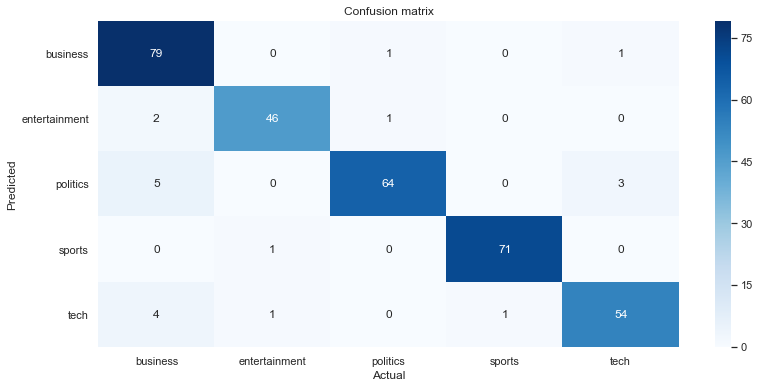

In [97]:
c_matrix = confusion_matrix(labels_test, svc_p)
plt.figure(figsize=(13,6))
sns.heatmap(c_matrix, 
            annot=True,
            xticklabels=df['category'].values, 
            yticklabels=df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [98]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(labels_train, svc_final.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, svc_p)
}

df_svc = pd.DataFrame(d, index=[0])

In [99]:
df_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.959281,0.94012


In [101]:
filename = 'svc_model.pickle'

In [102]:
pickle.dump(svc_final, open(filename, 'wb'))

In [103]:
pickle.dump(df_svc, open('df_svc.pickle', 'wb'))

In [105]:
knn_1 = KNeighborsClassifier()
pprint(knn_1.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [106]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]
param_grid = {'n_neighbors': n_neighbors}
knn = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)
grid_search1 = GridSearchCV(estimator=knn, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)
grid_search1.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.7min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [107]:
print(grid_search1.best_params_)
print("")
print(grid_search1.best_score_)

{'n_neighbors': 6}

0.9477333333333333


In [108]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}
knns = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)
grid_search12 = GridSearchCV(estimator=knns, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)
grid_search12.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   16.0s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [109]:
print(grid_search12.best_params_)
print("")
print(grid_search12.best_score_)

{'n_neighbors': 6}

0.9477333333333333


In [110]:
knn_final = grid_search12.best_estimator_

In [111]:
knn_final

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [112]:
knn_final.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [113]:
knn_p = knn_final.predict(features_test)

In [114]:
print(accuracy_score(labels_train, knn_final.predict(features_train)))

0.9598096245372819


In [115]:
print(accuracy_score(labels_test,knn_p))

0.9281437125748503


In [116]:
print(classification_report(labels_test,knn_p))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        81
           1       0.93      0.88      0.91        49
           2       0.97      0.92      0.94        72
           3       0.97      0.96      0.97        72
           4       0.86      0.92      0.89        60

    accuracy                           0.93       334
   macro avg       0.93      0.92      0.93       334
weighted avg       0.93      0.93      0.93       334



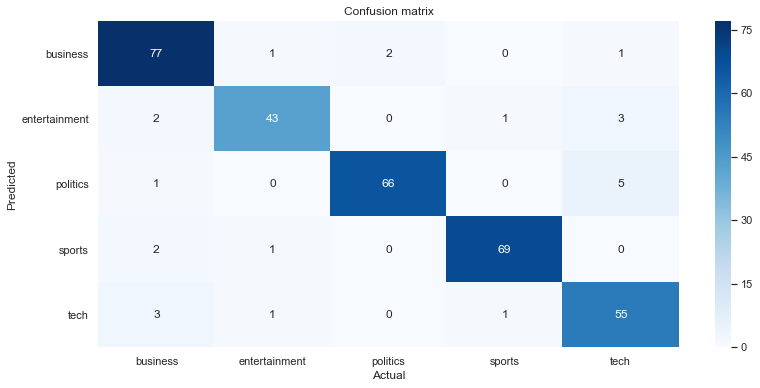

In [117]:
c_matrix = confusion_matrix(labels_test, knn_p)
plt.figure(figsize=(13,6))
sns.heatmap(c_matrix, 
            annot=True,
            xticklabels=df['category'].values, 
            yticklabels=df['category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [122]:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, knn_final.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knn_p)
}

df_knn = pd.DataFrame(d, index=[0])

In [123]:
df_knn

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.95981,0.928144


In [124]:
pickle.dump(knn_final, open('knn_model.pickle', 'wb'))
pickle.dump(df_knn, open('knn_df.pickle', 'wb'))

In [252]:
mnb_final = MultinomialNB(class_prior = None)
mnb_final

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [253]:
mnb_final.fit(features_train,labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [254]:
mnb_p = mnb_final.predict(features_test)

In [255]:
print(accuracy_score(labels_train, mnb_final.predict(features_train)))

0.9539925965097832


In [256]:
print(accuracy_score(labels_test, mnb_p))

0.9341317365269461


In [246]:
print(classification_report(labels_test,mnb_p))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        81
           1       0.96      0.90      0.93        49
           2       0.97      0.90      0.94        72
           3       0.97      0.99      0.98        72
           4       0.87      0.90      0.89        60

    accuracy                           0.93       334
   macro avg       0.94      0.93      0.93       334
weighted avg       0.94      0.93      0.93       334



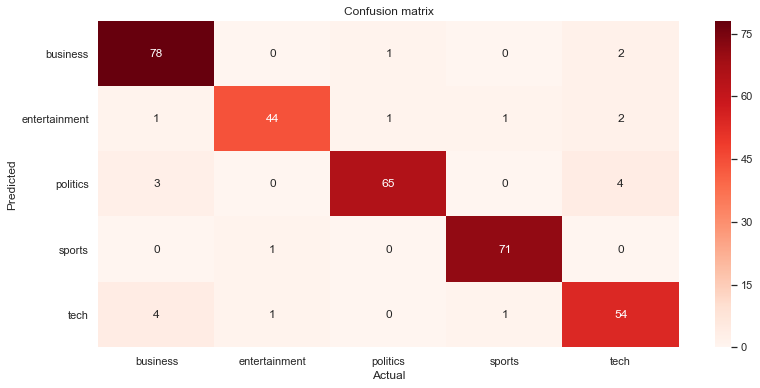

In [240]:
c_matrix = confusion_matrix(labels_test, mnb_p)
plt.figure(figsize=(13,6))
sns.heatmap(c_matrix, 
            annot=True,
            xticklabels=df['category'].values, 
            yticklabels=df['category'].values,
            cmap="Reds")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [137]:
d = {
     'Model': 'Multinomial Naive Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnb_final.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnb_p)
}

df_mnb = pd.DataFrame(d, index=[0])

In [138]:
df_mnb

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naive Bayes,0.953993,0.934132


In [139]:
pickle.dump(mnb_final, open('mnb_model.pickle', 'wb'))
pickle.dump(df_mnb, open('mnb_df.pickle', 'wb'))

In [141]:
mlr_1 = LogisticRegression(random_state = 8)

In [142]:
pprint(mlr_1.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [143]:
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
class_weight = ['balanced', None]
penalty = ['l2']
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

In [144]:
pprint(random_grid)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [145]:
mlr = LogisticRegression(random_state=8)
rand_search = RandomizedSearchCV(estimator=mlr,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)
rand_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   33.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=8,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'class_weight':

In [146]:
print(rand_search.best_params_)
print("")
print(rand_search.best_score_)

{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 1.0}

0.9566367001586462


In [147]:
C = [float(x) for x in np.linspace(start = 0.6, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['sag']
class_weight = ['balanced']
penalty = ['l2']
param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}
mlrs = LogisticRegression(random_state=8)
grid_search2 = GridSearchCV(estimator=mlrs, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)
grid_search2.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.5s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_st...
             param_grid={'C': [0.6, 0.6444444444444444, 0.6888888888888889,
                               0.7333333333333333, 0.7777777777777778,
                               0.8222222222222222, 0.8666666666666667,
                               0.9111111111111111, 0.9555555555555555, 1.0],
            

In [148]:
print(grid_search2.best_params_)
print("")
print(grid_search2.best_score_)

{'C': 1.0, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}

0.9685333333333334


In [149]:
mlr_final = grid_search2.best_estimator_

In [150]:
mlr_final

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [151]:
mlr_final.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [152]:
mlr_p = mlr_final.predict(features_test)

In [153]:
print(accuracy_score(labels_train, mlr_final.predict(features_train)))

0.9814912744579588


In [1]:
print(accuracy_score(labels_test, mlr_p))

NameError: name 'accuracy_score' is not defined

In [155]:
print(classification_report(labels_test,mlr_p))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        81
           1       0.90      0.96      0.93        49
           2       0.96      0.89      0.92        72
           3       0.99      0.99      0.99        72
           4       0.93      0.92      0.92        60

    accuracy                           0.94       334
   macro avg       0.94      0.94      0.94       334
weighted avg       0.94      0.94      0.94       334



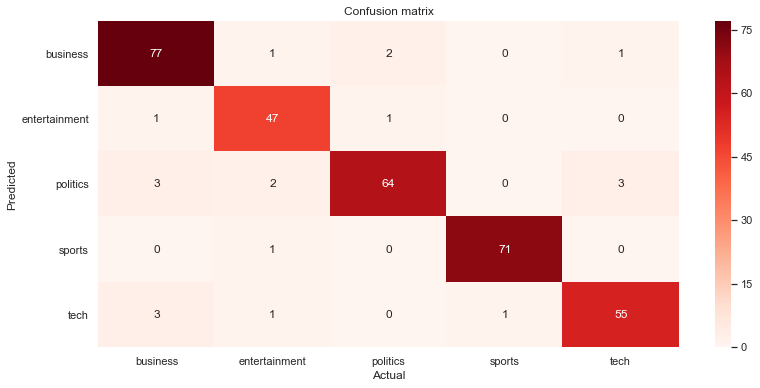

In [157]:
c_matrix = confusion_matrix(labels_test, mlr_p)
plt.figure(figsize=(13,6))
sns.heatmap(c_matrix, 
            annot=True,
            xticklabels=df['category'].values, 
            yticklabels=df['category'].values,
            cmap="Reds")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [158]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, mlr_final.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mlr_p)
}

df_mlr = pd.DataFrame(d, index=[0])

In [159]:
df_mlr

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.981491,0.94012


In [160]:
pickle.dump(mlr_final, open('mlr_model.pickle', 'wb'))
pickle.dump(df_mlr, open('mlr_df.pickle', 'wb'))

In [72]:
df_list = ["df_svc.pickle",
           "knn_df.pickle",
           "mnb_df.pickle",
           "mlr_df.pickle"]
amdf = pd.DataFrame()

for p in df_list:
    df = pickle.load(open(p,'rb'))
    amdf = amdf.append(df)

In [77]:
amdf.reset_index(inplace = True)

In [78]:
amdf

,index,Model,Training Set Accuracy,Test Set Accuracy
0,0,SVM,0.959281,0.940120
1,0,KNN,0.959810,0.928144
2,0,Multinomial Naive Bayes,0.953993,0.934132
3,0,Logistic Regression,0.981491,0.940120


In [79]:
amdf.drop(['index'],axis = 1, inplace = True)

In [80]:
amdf

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,0.959281,0.940120
1,KNN,0.959810,0.928144
2,Multinomial Naive Bayes,0.953993,0.934132
3,Logistic Regression,0.981491,0.940120


In [81]:
amdf.index = amdf.index + 1

In [82]:
amdf

,Model,Training Set Accuracy,Test Set Accuracy
1,SVM,0.959281,0.940120
2,KNN,0.959810,0.928144
3,Multinomial Naive Bayes,0.953993,0.934132
4,Logistic Regression,0.981491,0.940120


In [84]:
features = np.concatenate((features_train,features_test), axis = 0)
labels = np.concatenate((labels_train, labels_test), axis = 0)

In [86]:
print(features.shape)
print(labels.shape)

(2225, 300)
(2225,)


In [87]:
m = TSNE(n_components = 2)

In [89]:
p_comp = m.fit_transform(features)

In [90]:
df_comp = pd.DataFrame(data = p_comp, columns = ['component_1', 'component_2'])

In [91]:
df_label = pd.DataFrame(data = labels, columns = ['label'])

In [92]:
df_fin = pd.concat([df_comp,df_label], axis = 1)

In [94]:
df_fin.head(3)

,component_1,component_2,label
0,-10.398162,36.329426,4
1,-37.670193,-42.578648,2
2,-24.642580,11.448088,0


In [100]:
df_fin['label'] = df_fin['label'].astype(str)

In [101]:
cat_name = {"0":"business", "1":"entertainment", "2":"politics", "3":"sports", "4":"tech"}

In [105]:
df_fin['category'] = df_fin['label']

In [107]:
df_fin = df_fin.replace({'category' : cat_name})

In [108]:
df_fin.head(3)

,component_1,component_2,label,category
0,-10.398162,36.329426,4,tech
1,-37.670193,-42.578648,2,politics
2,-24.642580,11.448088,0,business


Text(0.5, 1.0, 't-SNE decomposition')

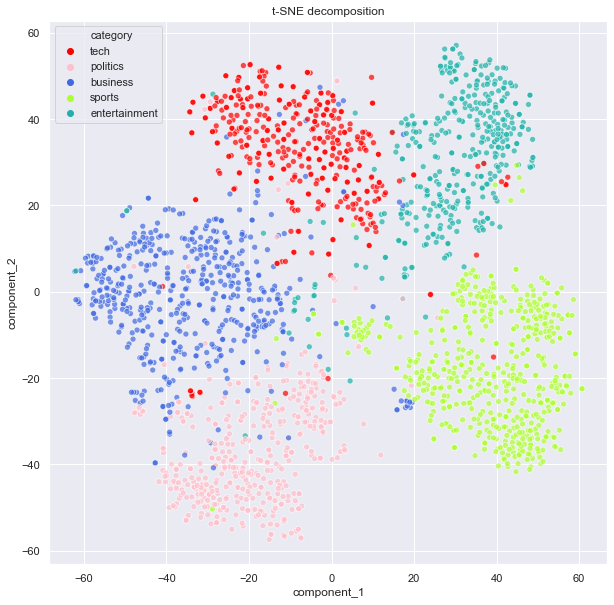

In [109]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'component_1',
                y = 'component_2',
                hue = 'category',
                data = df_fin,
                palette=["red", "pink", "royalblue", "greenyellow", "lightseagreen"],
                alpha = .7).set_title('t-SNE decomposition')

In [110]:
pickle.dump(data, open('tc_data.pickle', 'wb'))
pickle.dump(features_train, open('features_tr.pickle', 'wb'))
pickle.dump(features_test, open('features_te.pickle', 'wb'))
pickle.dump(labels_train, open('labels_tr.pickle', 'wb'))
pickle.dump(labels_test, open('labels_te.pickle', 'wb'))